# Data Mining Overview (Cont.)

As we discussed earlier, there are two broad categories of data mining methods: **supervised** and **unsupervised**.

In a **supervised** problem, the goal is to predict an outcome variable. It is labeled as supervised because there is a target that can supervise the learning and it is used to train the algorithm.

In an **unsupervised** learning problem, there is no outcome variable to guide the learning. In this case, the algorithm must extract meaningful information from the dataset without an output specified beforehand.

We will again use the dataset about Gies students as an example with column variables being major, year, and the type of internship they got. 

Suppose your goal is to find “similar” students by finding patterns in the data. If you do not have a particular outcome variable in your dataset that you are aiming to predict, this would be considered **unsupervised learning**.

Now suppose you are given a dataset of students that are currently enrolled in or have been enrolled in BADM 211. You want to use information about who dropped the course in previous semesters to predict who is at risk of dropping the course this semester. In this case, we have a particular outcome that we are trying to predict. 

At least for some of the data, we have information about the outcome. The remaining variables (the variables other than the one that indicates if a student dropped the course) are the predictors, or the independent variables, in the model. In this example, because we have a specific target we’re interested in predicting, it is a **supervised learning** problem.

In data mining, there are many synonyms for common terms. For example, the outcome variable is the one that we would like to predict in a supervised learning problem. The outcome variable can be referred to as the response, predicted, target, label, or dependent variable.

For a supervised learning problem, we usually have a regression or a classification problem.

In a **regression** problem, the outcome variable is continuous. For example, if you want to predict how much a customer will spend, that is a regression problem. It should be noted that regression problems are also called prediction problems, but we will stick to using the term regression.

On the other hand, for a **classification** problem, the outcome variable is a categorical variable. For example, predicting whether or not a customer will spend more than $500 is a classification problem. 

| 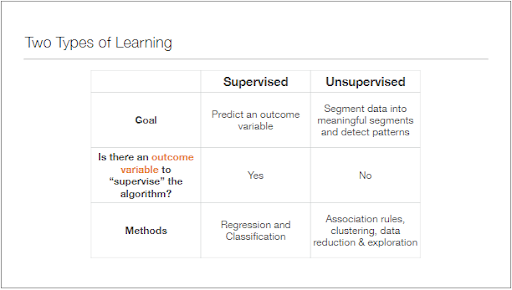|
|:--:|
|<b>Fig. 1 - Summary of Supervised vs. Unsupervised Learning</b>|

For unsupervised learning problems, we may want to use methods like association rules, clustering, and data reduction and exploration.

**Association rules** allow us to determine if different variables go together. Amazon uses association rules to suggest items to you when you are making a purchase. 

**Data reduction** is an unsupervised method that allows us to reduce the complexity of our data sets. 

**Clustering** is useful for grouping like records. For example, we might use clusters to develop customer segments. In a healthcare setting, we could use this to group patients based on genetic signatures, allowing for more targeted treatments.

Now that we know the different types of data mining models, we must determine how to evaluate and select these models. For now, we will focus on supervised models, where there is a specific outcome variable we are trying to predict.

**Overfitting** is a fundamental concept in data science. When we want to learn from a given dataset, our goal is to glean enough information to make accurate predictions on new data, while ensuring that we do not learn the idiosyncrasies of the data (which are not generalizable to new data). If we learn these idiosyncrasies, then we are overfitting.

| 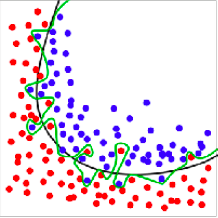|
|:--:|
|<b>Fig. 2</b>|

Suppose we have a graph of two types of dots, blue and red. We want to use this data to learn where the boundary between the red and blue dots should be. In the figure, we see two models: the green line and the black lines.

Think about which fits the sample better and which generalizes all of the data better.

The green model suggests that the two new dots on the right should be red and the new dot on the left should be blue. However, we must determine if this is reasonable.

Both of the supposedly red dots (as predicted by the green line model) are mostly surrounded by blue dots and the supposedly blue dot is mostly surrounded by red dots. 

With the green model, we’ve ended up with a model that’s really complex and the line isn’t smooth at all. This is an example of overfitting because the model learned too much from the underlying data and attempts to capture every minor fluctuation.Though we may think we’re fitting a better model, we’re learning that the noise in the model won’t be generalizable, meaning if the data is changed, the green model will likely not be favorable. 

**Addressing Overfitting:**

We’ve learned that overfitting is a problem because it means our model won’t generalize to new data. We will simulate what will happen when we have to apply our model to real-world data by splitting our dataset into two or three parts.

The first partition is called the training partition. We take a subset of our original dataset and use it to train - or develop - the model. From the remaining records, we create a second partition which we call the validation partition.

Remember, we trained our models using the training partition; we then apply each of those models to the data in the validation partition.

In particular, for each model, we make predictions about the outcome variable for the validation set. We can then compare those predictions to what we know to be the actual outcomes. Doing so allows us to assess predictive performances for each of our models.

| 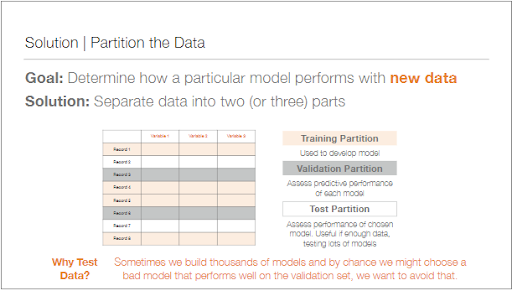|
|:--:|
|<b>Fig. 3 - Data Partitioning Summary</b>|

If there is enough data or if many models are being tested, we will have a third partition: the test partition.

This can be useful if we are comparing thousands of models. In this case, it is likely that a bad model will randomly perform well on the validation partition. Testing the final model on a third partition allows us to avoid this scenario. Data scientists use the terms validation partition and test partition interchangeably.

| 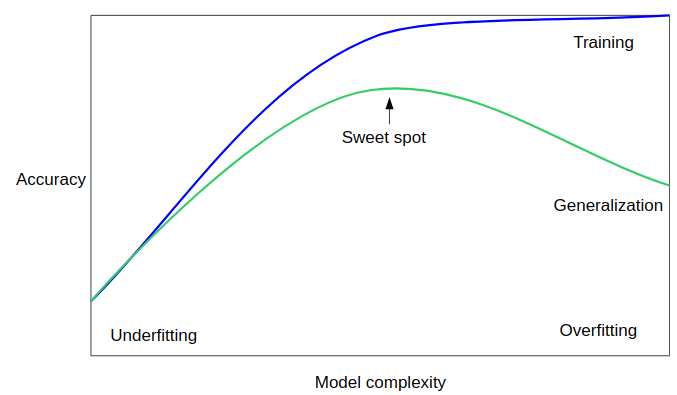|
|:--:|
|<b>Fig. 4 - Sweet Spot of Model Complexity</b>|

Partitioning allows us to find the **sweet spot** of **model complexity.** In this figure, the blue line represents how well a model performs on a training dataset and the green line represents how well it generalizes: how well it performs on the validation and test sets.

We see that if our model isn’t complex enough, we will likely underfit our data. As the model increases in complexity, our model's accuracy will improve both for the training data and for test sets. 

Eventually, we’ll hit a sweet spot where the model is pretty accurate for both the training data and the test data. 

If we continue tweaking the model beyond this point, it will become too fitted to the training data and may not fit the test data as accurately. **Partitioning** helps us avoid this.


A couple of notes: 1) The terminology here can get confusing: we sometimes refer to the validation set as a test set or, as we used in the header, a holdout set. 2) We'll be taking about a more sophisticated version of this called cross-validation. But let's start here to get our bearings.

Below, randomly sample 60% of the dataset into a training dataset, where train_X holds the predictors and train_y holds the outcome variable. The remaining 40% serve as a validation set, where test_X holds the predictors and test_y holds the outcome variable.

```
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.40, random_state=12)

print('Training: ', train_X.shape)
print('Validation: ', test_X.shape)
```
Notice that we also set the random_state equal to 12. This ensures that we are not randomly selecting a new training and test set every time we run that cell. If we didn't specify the random_state, we'd never be able to replicate our work.

Another method, aside from partitions, is what’s called **K-Fold cross validation.** Cross validation is more stable and works with less data than partition requires. In this method, we create a k number of subsets of the data.

We fit each model k times: each time we set aside one of the k folds as a test set and we use the remaining folds as the training set. We then end up with k measures of accuracy. We can combine these by taking the average to assess a given model’s accuracy. 

Let’s look at an example of this with k=5.

| 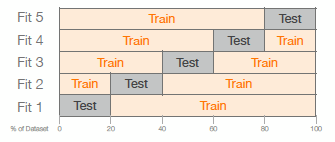|
|:--:|
|<b>Fig. 5 - Train-Test Split with k = 5</b>|

We’ve split up our dataset so 20% is in the test set and the remaining 80% is in the training set. We will first fit the model on this training set, test it in the test set, and then evaluate accuracy.

Now, we’ll set aside 20% to use as a test set and then use the remaining 80% as our training set. Again, we’ll fit the model on this new training set and assess the accuracy on the new set.

We’ll do this 3 more times, having in total fit the model 5 times with 5 different accuracy scores. We can combine these to understand how accurate the model will be on average. If we use this method on multiple models, we can compare those average accuracies to pick the best fitting model.

Next, we will look at an example of how to measure the accuracy of your model.

We can then take the model which was trained using the training set and use it to make predictions on this holdout set, a final estimate of the accuracy of the model. Those predictions are in the greyed out column.

The actual outcome will be known as y and the predicted outcome will be known as y-hat.

| 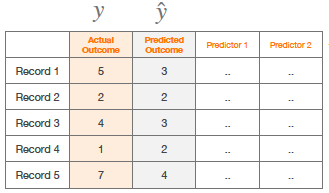|
|:--:|
|<b>Fig. 6 - Actual vs. Predicted Outcomes</b>|

We can use the difference between the actual and predicted outcomes to calculate the error for each record. We can then combine the errors across all of the records in the test set to determine the predictive accuracy.

There are five common ways we can combine the errors.

| 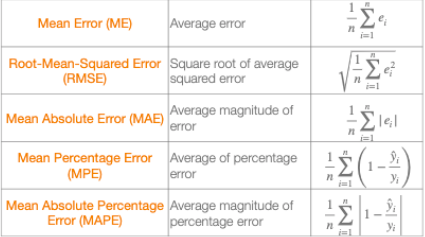|
|:--:|
|<b>Fig. 7 - Types of Errors</b>|

The simplest way to combine errors is to take the average. This is called the **average** (or mean) **error**. The benefit is that it is easy to understand, though the downside is that errors may cancel out. For example, let's assume that half of my records had an error and half had an error of -100. The mean error would be zero even though none of the records were perfectly predicted. Therefore, a small mean error does NOT indicate good performance. However, this can potentially tell us whether the model consistently overestimates or underestimates the outcome.

If you wanted to instead look at the magnitude of the error, we can take the square or the absolute value of the error term.

The **root mean squared error** (RMSE) sums the squared error terms then takes the average and the square root. RMSE is more sensitive to large errors because errors are squared before being averaged. Use this measure if large errors are undesirable.

The **mean absolute error** (MAE) averages the absolute value of the error.

Both the root mean squared error and mean absolute error give us a sense of the absolute error, and both are used to assess performance of *predictive* models.

To make sense of the relative error, we can use either the **mean percentage error** (MPE) or the **mean absolute percentage error** (MAPE). This will not work if any of our actual outcome values are equal to 0, since we divide by y.

MPE and MAPE give us a sense of the relative error because the prediction is divided by the actual value. Again, this won’t work on your data if you have any data points equal to 0.

We will now summarize and share some of the key-takeaways.


*   First, before going into data mining algorithms, it is important to take necessary steps to prepare before the model stage by exploring and pre-processing the data.

*   Second, data mining consists of two classes of methods: supervised (Classification & Prediction) and unsupervised (Association Rules, Data Reduction, Data Exploration & Visualization). In supervised data mining we have an outcome variable we are trying to predict while in unsupervised data mining we do not.

*   We use partitioning to evaluate how well our model performs and to avoid overfitting to our sample.

*   With partitioning, we fit the model to the training partition and assess the accuracy on the validation and test partitions.

*   Data mining methods are usually applied to a sample from a large database and then the best model is used to score the entire database.

**(introduce Python Packages/modules)**

| Name         | Description                                                   |
|--------------|---------------------------------------------------------------|
| NumPy        | Numerical computation with python using arrays and matrices   |
| SciPy        | Scientific computation with python for optimization and stats |
| Matplotlib   | Creates comprehensive visualizations                          |
| Seaborn      | Creates comprehensive visualizations with improved graphics   |
| Pandas       | Data manipulation and analysis                                |
| Scikit_learn | Machine learning tools                                        |

## References:

[NumPy](http://www.numpy.org/)

[SciPy](http://www.scipy.org/scipylib/index.html)

[Matplotlib](http://matplotlib.org/)

[Seaborn](http://web.stanford.edu/~mwaskom/software/seaborn/index.html)

[Pandas](http://pandas.pydata.org/)

[Scikit_learn](http://scikit-learn.org/stable/index.html)

## Glossary:

**Supervised Learning:**

**Unsupervised Learning:**

**Regression:**

**Classification:**

**Association Rules:**

**Data Reduction:**

**Clustering:**

**Overfitting:**

**Partitioning:**

**K-fold Cross Validation:**

**Mean Error:**

**Root Mean Squared Error (RMSE):**

**Mean Absolute Error (MAE):**

**Mean Percentage Error (MPE):**

**Mean Absolute Percentage Error (MAPE):**